Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and processing

In [3]:
#loading csv data to a panda dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and column
gold_data.shape

(2290, 6)

In [7]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#statistical measures of the data
gold_data.describe

<bound method NDFrame.describe of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correalation:
1. Positive Correlation
2. Negative Correlation


In [11]:
correlation = gold_data.corr()

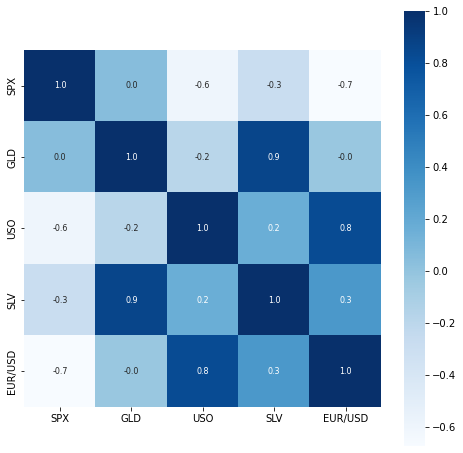

In [14]:
#constructing the heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar= True, square= True, fmt='.1f', annot= True, annot_kws={'size':8}, cmap='Blues')

In [15]:
#correlation values of the GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


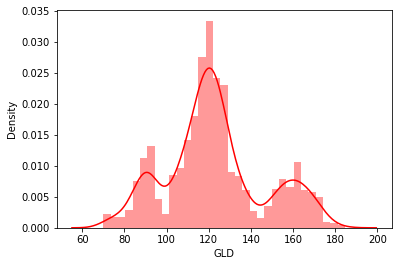

In [17]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color= 'Red')

Splitting the features and the target

In [18]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

Model Training: Random Forest Regression

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [24]:
#prdition on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.64579961  81.72750011 115.91719963 127.82930112 120.60400137
 154.73819729 150.19209915 126.14479986 117.6273986  125.92210105
 116.67570097 171.76850049 141.14129839 168.06759871 115.06900006
 117.37320055 138.18330339 170.07170079 159.21510259 158.04190011
 155.01930002 124.98329993 175.90489908 157.77720323 125.33350033
  93.69869975  77.07020019 119.9967999  119.1080992  167.40030013
  88.23370069 125.37660026  91.24070077 117.70610038 121.12349901
 135.79810078 115.6273013  115.12970074 146.11829939 107.33180114
 104.26140246  87.19589804 126.62290078 117.68610024 154.39909897
 119.61620043 108.73029955 108.19899879  93.17880076 127.28399736
  74.99470028 113.61529924 121.41480021 111.35209931 118.86109896
 121.13999939 157.86939965 166.87730072 147.15529707  85.85619867
  94.50630048  87.04299895  90.64330015 118.71610086 126.37280065
 127.64410044 169.43439984 122.23289919 117.4106989   98.82090024
 168.16870197 142.58979911 132.1666023  121.08190232 120.81659962
 119.87900

In [26]:
#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9893213362939814


Compare actual values and predicted values

In [27]:
Y_test = list(Y_test)

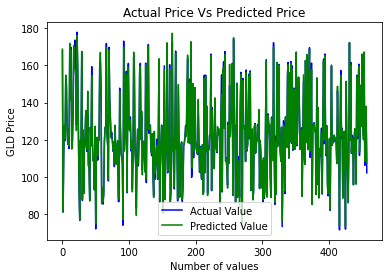

In [30]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()